# Module 3a: Image Compression

****

How can we represent the same amount of data while taking up less memory.  Image Compression!  Let's go through a simple example. 

Let's begin with how our eye works.

<img src="Graphics/eye.png">

"Crudely speaking, the human eyes is a spherical camera with a 20mm focal length...The iris controls the amount of light passing through the lens by controlling the size of the pupil...The retina is unevenly populated with sensor cells.  An area near the center of the retina, called the fovea, has a very dense concentration of color receptors, called cones.  Away from the center, the density of cones decreases while the density of black and white receptors, the rods, increases." (Computer Vision, Linda Shapiro, 2000)<br><br>

Our visual system is interpreting color on top of the black and white information in our peripheral vision.  The person sitting next to you might appear in color (you could have color blindness) but your eye is mainly capturing black and white information.  Since your peripheral vision has a limited amount of color receptors (cones), the color information needs to be shared among a large section of black and white receptors (rods).  Our brains combine the cone's color information with the neighboring rod's black and white information producing a color image.<br><br>

Let's try to use our brains technique in an image compression algorithm <br>

|| **0** | **1** | **2** |
| :-: | :-: | :-: | :-: |
| **0** |  55,100,200  |  74,124,100  | 89,210,10  |
| **1** |  124,74,191  |  174,43,34  |  201,142,60  |
| **2** |  191,50,10  |  215,111,84  |  245,139,81  |

How much memory is used to store one color image of size 200 pixels by 200 pixels? Which contains 40,000 individual pixels, each containing three 8 bit Integers.<br> 

40,000 pixels x 24 bits (RGB) = 960,000 bits = 120,000 bytes = 0.12 megabytes

Simple approach.  Two seperate arrays.  

The first contains the brightness values of all the pixels. This can be saved as one value, one 8 Bit Integer, stored in a 2D array ([]). The second contains the RGB pixel values of every other row. This can be saved in 3 values, three 8 bit Integers, stored in a 3D array [[[]]].   

1)  All the Brightness values. GreyScale
2)  Every other row of RGB vales. 

40,000 pixels x 8 bits (Greyscale) = 320,000 bits = 40,000 bytes = 0.04 megabytes<br>
20,000 pixels x 24 bits (RGB) = 480,000 bits =  60,000 bytes = 0.06 megabytes

We saved 0.02 megabytes!  A 17% savings!  Not bad at all for such a simple approach.

|| **0** | **1** | **2** |
| :-: | :-: | :-: | :-: |
| **0** |  226,226,226  |  226,226,226  | 226,226,226  |
| **1** |  124  |  124  |  124  |
| **2** |  40,40,40  |  40,40,40  |  40,40,40  |





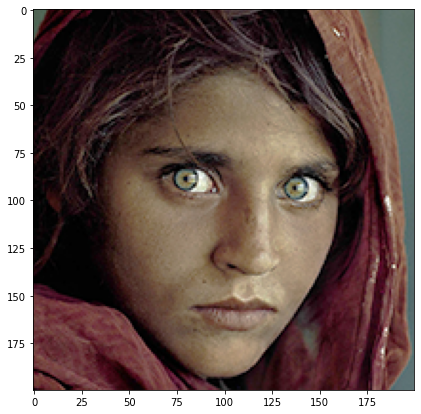

In [134]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving and displaying an image
img = cv2.imread('Graphics/face.png')

#OpenCV by defualt uses BGR instead of RGB.  First convert the color values to greyscale using the OpenCV implementation.  Then convert from BGR to RGB to draw to the screen.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow('Face',img)
#Use matplotlib while using a python notebook.  Let's make it bigger to see the result better.
fig = plt.figure(figsize = (7,7))
plt.imshow(img)


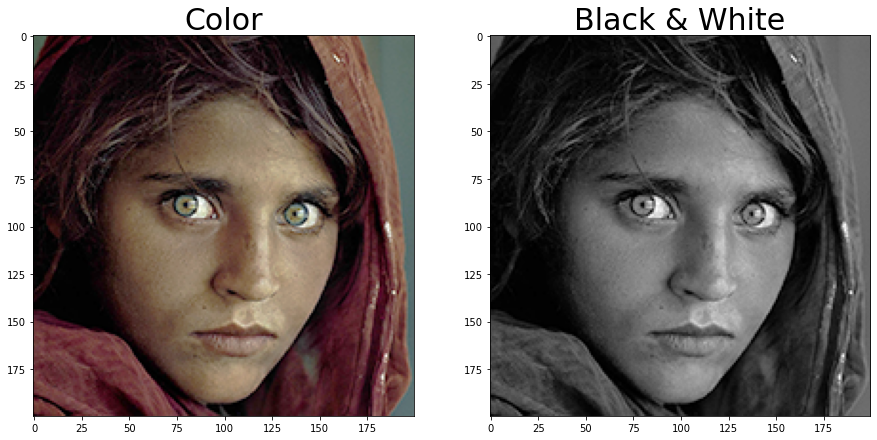

In [135]:
# Save a copy of the image in color and grayscale. 

colorData = img
greyData = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# Show images. 
fig = plt.figure(figsize = (15,30))
columns = 2
rows = 1
fig.add_subplot(rows,columns, 1)
plt.imshow(colorData)
plt.title('Color', fontdict={'fontsize': 30})
fig.add_subplot(rows,columns, 2)
plt.imshow(greyData, cmap="gray")
plt.title('Black & White', fontdict={'fontsize': 30})
plt.show()

###  What is the size of the color and black & white array. 

In [136]:
print(colorData.shape)
print(greyData.shape)

(200, 200, 3)
(200, 200)


## Compression (Encoder)

In [137]:
# Create a blank array to size our compressed image. 

blended = np.zeros((200,200,3), dtype=np.uint8)

#Save the height, width, and depth
h = img.shape[0]
w = img.shape[1]


for y in range(0, h):
    for x in range(0,w):
        # Use the modulo operator as a way to get odd and even rows. 
        if(y % 2 == 0):
            # Save the color data in even rows. 
            blended[y,x] = colorData[y,x]
        else:
            # Save the black and white data in odd rows
            blended[y,x] = greyData[y,x]

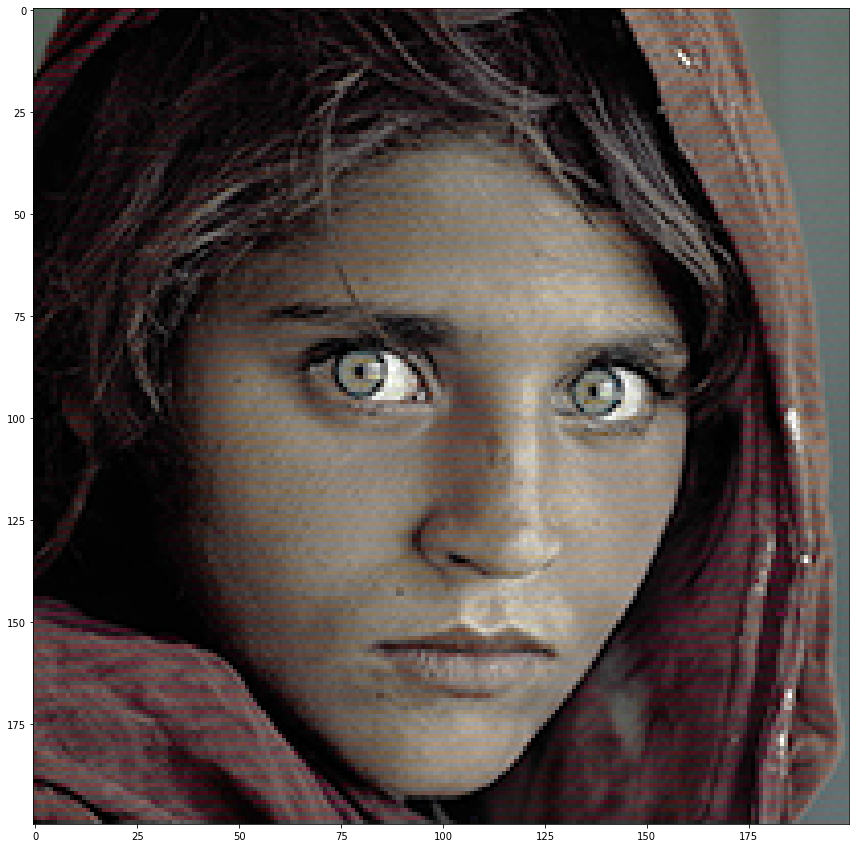

In [138]:
fig = plt.figure(figsize = (15,15))
plt.imshow(blended)

## Convert to YCrCb color system.  Explain and go back to Module 1a. Three axis color. <br>



<h2>RGB <span class="MathJax_Preview" style="display: none;"></span><span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" style=""><nobr><span class="math" id="MathJax-Span-195" style="width: 1.251em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.017em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.563em, 1000.98em, 2.305em, -999.998em); top: -2.184em; left: 0em;"><span class="mrow" id="MathJax-Span-196"><span class="mo" id="MathJax-Span-197" style="font-family: MathJax_Main;">↔</span></span><span style="display: inline-block; width: 0px; height: 2.188em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.045em; border-left: 0px solid; width: 0px; height: 0.717em;"></span></span></nobr></span><script type="math/tex" id="MathJax-Element-11">\leftrightarrow</script> YCrCb JPEG (or YCC) </h2>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-12-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-198" style="width: 19.851em; display: inline-block;"><span style="display: inline-block; position: relative; width: 16.279em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.291em, 1016.28em, 2.403em, -999.997em); top: -2.163em; left: 0em;"><span class="mrow" id="MathJax-Span-199"><span class="mi" id="MathJax-Span-200" style="font-family: MathJax_Math; font-style: italic;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.179em;"></span></span><span class="mo" id="MathJax-Span-201" style="font-family: MathJax_Main; padding-left: 0.296em;">←</span><span class="mn" id="MathJax-Span-202" style="font-family: MathJax_Main; padding-left: 0.296em;">0.299</span><span class="mo" id="MathJax-Span-203" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mi" id="MathJax-Span-204" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">R</span><span class="mo" id="MathJax-Span-205" style="font-family: MathJax_Main; padding-left: 0.237em;">+</span><span class="mn" id="MathJax-Span-206" style="font-family: MathJax_Main; padding-left: 0.237em;">0.587</span><span class="mo" id="MathJax-Span-207" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mi" id="MathJax-Span-208" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">G</span><span class="mo" id="MathJax-Span-209" style="font-family: MathJax_Main; padding-left: 0.237em;">+</span><span class="mn" id="MathJax-Span-210" style="font-family: MathJax_Main; padding-left: 0.237em;">0.114</span><span class="mo" id="MathJax-Span-211" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mi" id="MathJax-Span-212" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">B</span></span><span style="display: inline-block; width: 0px; height: 2.169em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.139em; border-left: 0px solid; width: 0px; height: 1.075em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-12">Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B</script>
</p>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-13-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-213" style="width: 15.635em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.825em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.232em, 1012.83em, 2.579em, -999.997em); top: -2.163em; left: 0em;"><span class="mrow" id="MathJax-Span-214"><span class="mi" id="MathJax-Span-215" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.061em;"></span></span><span class="mi" id="MathJax-Span-216" style="font-family: MathJax_Math; font-style: italic;">r</span><span class="mo" id="MathJax-Span-217" style="font-family: MathJax_Main; padding-left: 0.296em;">←</span><span class="mo" id="MathJax-Span-218" style="font-family: MathJax_Main; padding-left: 0.296em;">(</span><span class="mi" id="MathJax-Span-219" style="font-family: MathJax_Math; font-style: italic;">R</span><span class="mo" id="MathJax-Span-220" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mi" id="MathJax-Span-221" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.179em;"></span></span><span class="mo" id="MathJax-Span-222" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-223" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mn" id="MathJax-Span-224" style="font-family: MathJax_Main; padding-left: 0.237em;">0.713</span><span class="mo" id="MathJax-Span-225" style="font-family: MathJax_Main; padding-left: 0.237em;">+</span><span class="mi" id="MathJax-Span-226" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-227" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-228" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-229" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-230" style="font-family: MathJax_Math; font-style: italic;">a</span></span><span style="display: inline-block; width: 0px; height: 2.169em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-13">Cr \leftarrow (R-Y) \cdot 0.713 + delta</script>
</p>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-14-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-231" style="width: 15.635em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.825em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.232em, 1012.83em, 2.579em, -999.997em); top: -2.163em; left: 0em;"><span class="mrow" id="MathJax-Span-232"><span class="mi" id="MathJax-Span-233" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.061em;"></span></span><span class="mi" id="MathJax-Span-234" style="font-family: MathJax_Math; font-style: italic;">b</span><span class="mo" id="MathJax-Span-235" style="font-family: MathJax_Main; padding-left: 0.296em;">←</span><span class="mo" id="MathJax-Span-236" style="font-family: MathJax_Main; padding-left: 0.296em;">(</span><span class="mi" id="MathJax-Span-237" style="font-family: MathJax_Math; font-style: italic;">B</span><span class="mo" id="MathJax-Span-238" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mi" id="MathJax-Span-239" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.179em;"></span></span><span class="mo" id="MathJax-Span-240" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-241" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mn" id="MathJax-Span-242" style="font-family: MathJax_Main; padding-left: 0.237em;">0.564</span><span class="mo" id="MathJax-Span-243" style="font-family: MathJax_Main; padding-left: 0.237em;">+</span><span class="mi" id="MathJax-Span-244" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-245" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-246" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-247" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-248" style="font-family: MathJax_Math; font-style: italic;">a</span></span><span style="display: inline-block; width: 0px; height: 2.169em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-14">Cb \leftarrow (B-Y) \cdot 0.564 + delta</script>
</p>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-15-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-249" style="width: 15.635em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.825em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.232em, 1012.71em, 2.579em, -999.997em); top: -2.163em; left: 0em;"><span class="mrow" id="MathJax-Span-250"><span class="mi" id="MathJax-Span-251" style="font-family: MathJax_Math; font-style: italic;">R</span><span class="mo" id="MathJax-Span-252" style="font-family: MathJax_Main; padding-left: 0.296em;">←</span><span class="mi" id="MathJax-Span-253" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.296em;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.179em;"></span></span><span class="mo" id="MathJax-Span-254" style="font-family: MathJax_Main; padding-left: 0.237em;">+</span><span class="mn" id="MathJax-Span-255" style="font-family: MathJax_Main; padding-left: 0.237em;">1.403</span><span class="mo" id="MathJax-Span-256" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mo" id="MathJax-Span-257" style="font-family: MathJax_Main; padding-left: 0.237em;">(</span><span class="mi" id="MathJax-Span-258" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.061em;"></span></span><span class="mi" id="MathJax-Span-259" style="font-family: MathJax_Math; font-style: italic;">r</span><span class="mo" id="MathJax-Span-260" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mi" id="MathJax-Span-261" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-262" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-263" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-264" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-265" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mo" id="MathJax-Span-266" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.169em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-15">R \leftarrow Y + 1.403 \cdot (Cr - delta)</script>
</p>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-267" style="width: 27.52em; display: inline-block;"><span style="display: inline-block; position: relative; width: 22.544em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.232em, 1022.43em, 2.579em, -999.997em); top: -2.163em; left: 0em;"><span class="mrow" id="MathJax-Span-268"><span class="mi" id="MathJax-Span-269" style="font-family: MathJax_Math; font-style: italic;">G</span><span class="mo" id="MathJax-Span-270" style="font-family: MathJax_Main; padding-left: 0.296em;">←</span><span class="mi" id="MathJax-Span-271" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.296em;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.179em;"></span></span><span class="mo" id="MathJax-Span-272" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mn" id="MathJax-Span-273" style="font-family: MathJax_Main; padding-left: 0.237em;">0.714</span><span class="mo" id="MathJax-Span-274" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mo" id="MathJax-Span-275" style="font-family: MathJax_Main; padding-left: 0.237em;">(</span><span class="mi" id="MathJax-Span-276" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.061em;"></span></span><span class="mi" id="MathJax-Span-277" style="font-family: MathJax_Math; font-style: italic;">r</span><span class="mo" id="MathJax-Span-278" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mi" id="MathJax-Span-279" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-280" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-281" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-282" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-283" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mo" id="MathJax-Span-284" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-285" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mn" id="MathJax-Span-286" style="font-family: MathJax_Main; padding-left: 0.237em;">0.344</span><span class="mo" id="MathJax-Span-287" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mo" id="MathJax-Span-288" style="font-family: MathJax_Main; padding-left: 0.237em;">(</span><span class="mi" id="MathJax-Span-289" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.061em;"></span></span><span class="mi" id="MathJax-Span-290" style="font-family: MathJax_Math; font-style: italic;">b</span><span class="mo" id="MathJax-Span-291" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mi" id="MathJax-Span-292" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-293" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-294" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-295" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-296" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mo" id="MathJax-Span-297" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.169em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-16">G \leftarrow Y - 0.714 \cdot (Cr - delta) - 0.344 \cdot (Cb - delta)</script>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-298" style="width: 15.635em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.825em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.232em, 1012.71em, 2.579em, -999.997em); top: -2.163em; left: 0em;"><span class="mrow" id="MathJax-Span-299"><span class="mi" id="MathJax-Span-300" style="font-family: MathJax_Math; font-style: italic;">B</span><span class="mo" id="MathJax-Span-301" style="font-family: MathJax_Main; padding-left: 0.296em;">←</span><span class="mi" id="MathJax-Span-302" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.296em;">Y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.179em;"></span></span><span class="mo" id="MathJax-Span-303" style="font-family: MathJax_Main; padding-left: 0.237em;">+</span><span class="mn" id="MathJax-Span-304" style="font-family: MathJax_Main; padding-left: 0.237em;">1.773</span><span class="mo" id="MathJax-Span-305" style="font-family: MathJax_Main; padding-left: 0.237em;">⋅</span><span class="mo" id="MathJax-Span-306" style="font-family: MathJax_Main; padding-left: 0.237em;">(</span><span class="mi" id="MathJax-Span-307" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.061em;"></span></span><span class="mi" id="MathJax-Span-308" style="font-family: MathJax_Math; font-style: italic;">b</span><span class="mo" id="MathJax-Span-309" style="font-family: MathJax_Main; padding-left: 0.237em;">−</span><span class="mi" id="MathJax-Span-310" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.237em;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-311" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-312" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-313" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-314" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mo" id="MathJax-Span-315" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.169em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-17">B \leftarrow Y + 1.773 \cdot (Cb - delta)</script>
</p>
</p>

<p> where </p>

<p class="formulaDsp">
<span class="MathJax_Preview" style="display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="text-align: center;"><nobr><span class="math" id="MathJax-Span-316" style="width: 23.012em; display: inline-block;"><span style="display: inline-block; position: relative; width: 18.855em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.115em, 1018.86em, 5.272em, -999.997em); top: -3.451em; left: 0em;"><span class="mrow" id="MathJax-Span-317"><span class="mi" id="MathJax-Span-318" style="font-family: MathJax_Math; font-style: italic;">d<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-319" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-320" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-321" style="font-family: MathJax_Math; font-style: italic;">t</span><span class="mi" id="MathJax-Span-322" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mo" id="MathJax-Span-323" style="font-family: MathJax_Main; padding-left: 0.296em;">=</span><span class="mrow" id="MathJax-Span-324" style="padding-left: 0.296em;"><span class="mo" id="MathJax-Span-325" style="vertical-align: 2.169em;"><span style="display: inline-block; position: relative; width: 0.881em; height: 0px;"><span style="position: absolute; font-family: MathJax_Size4; top: -3.1em; left: 0em;">⎧<span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -1.051em; left: 0em;">⎩<span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; font-family: MathJax_Size4; top: -1.812em; left: 0em;">⎨<span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -2.866em; left: 0em;">⎪<span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="font-family: MathJax_Size4; position: absolute; top: -0.992em; left: 0em;">⎪<span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mtable" id="MathJax-Span-326" style="padding-right: 0.179em; padding-left: 0.179em;"><span style="display: inline-block; position: relative; width: 14.054em; height: 0px;"><span style="position: absolute; clip: rect(2.286em, 1002.46em, 6.15em, -999.997em); top: -4.505em; left: 0em;"><span style="display: inline-block; position: relative; width: 2.52em; height: 0px;"><span style="position: absolute; clip: rect(3.165em, 1001.47em, 4.16em, -999.997em); top: -5.325em; left: 0em;"><span class="mtd" id="MathJax-Span-327"><span class="mrow" id="MathJax-Span-328"><span class="mn" id="MathJax-Span-329" style="font-family: MathJax_Main;">128</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.106em, 1002.46em, 4.16em, -999.997em); top: -3.92em; left: 0em;"><span class="mtd" id="MathJax-Span-335"><span class="mrow" id="MathJax-Span-336"><span class="mn" id="MathJax-Span-337" style="font-family: MathJax_Main;">32768</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.165em, 1001.23em, 4.16em, -999.997em); top: -2.515em; left: 0em;"><span class="mtd" id="MathJax-Span-343"><span class="mrow" id="MathJax-Span-344"><span class="mn" id="MathJax-Span-345" style="font-family: MathJax_Main;">0.5</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.511em;"></span></span><span style="position: absolute; clip: rect(2.52em, 1010.54em, 6.56em, -999.997em); top: -4.739em; left: 3.516em;"><span style="display: inline-block; position: relative; width: 10.542em; height: 0px;"><span style="position: absolute; clip: rect(3.106em, 1006.68em, 4.394em, -999.997em); top: -5.325em; left: 0em;"><span class="mtd" id="MathJax-Span-330"><span class="mrow" id="MathJax-Span-331"><span class="mstyle" id="MathJax-Span-332"><span class="mrow" id="MathJax-Span-333"><span class="mtext" id="MathJax-Span-334" style="font-family: MathJax_Main;">for 8-bit images</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.106em, 1007.15em, 4.394em, -999.997em); top: -3.92em; left: 0em;"><span class="mtd" id="MathJax-Span-338"><span class="mrow" id="MathJax-Span-339"><span class="mstyle" id="MathJax-Span-340"><span class="mrow" id="MathJax-Span-341"><span class="mtext" id="MathJax-Span-342" style="font-family: MathJax_Main;">for 16-bit images</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.106em, 1010.54em, 4.394em, -999.997em); top: -2.515em; left: 0em;"><span class="mtd" id="MathJax-Span-346"><span class="mrow" id="MathJax-Span-347"><span class="mstyle" id="MathJax-Span-348"><span class="mrow" id="MathJax-Span-349"><span class="mtext" id="MathJax-Span-350" style="font-family: MathJax_Main;">for floating-point images</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.745em;"></span></span></span></span><span class="mo" id="MathJax-Span-351"></span></span></span><span style="display: inline-block; width: 0px; height: 3.457em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.068em; border-left: 0px solid; width: 0px; height: 4.789em;"></span></span></nobr></span></div><script type="math/tex; mode=display" id="MathJax-Element-18">delta = \left \{ \begin{array}{l l} 128 & \mbox{for 8-bit images} \\ 32768 & \mbox{for 16-bit images} \\ 0.5 & \mbox{for floating-point images} \end{array} \right .</script>
</p>

<p> Y, Cr, and Cb cover the whole value range. </p>

## Discuss 4:4:4, 4:2:2, & 4:2:0 color

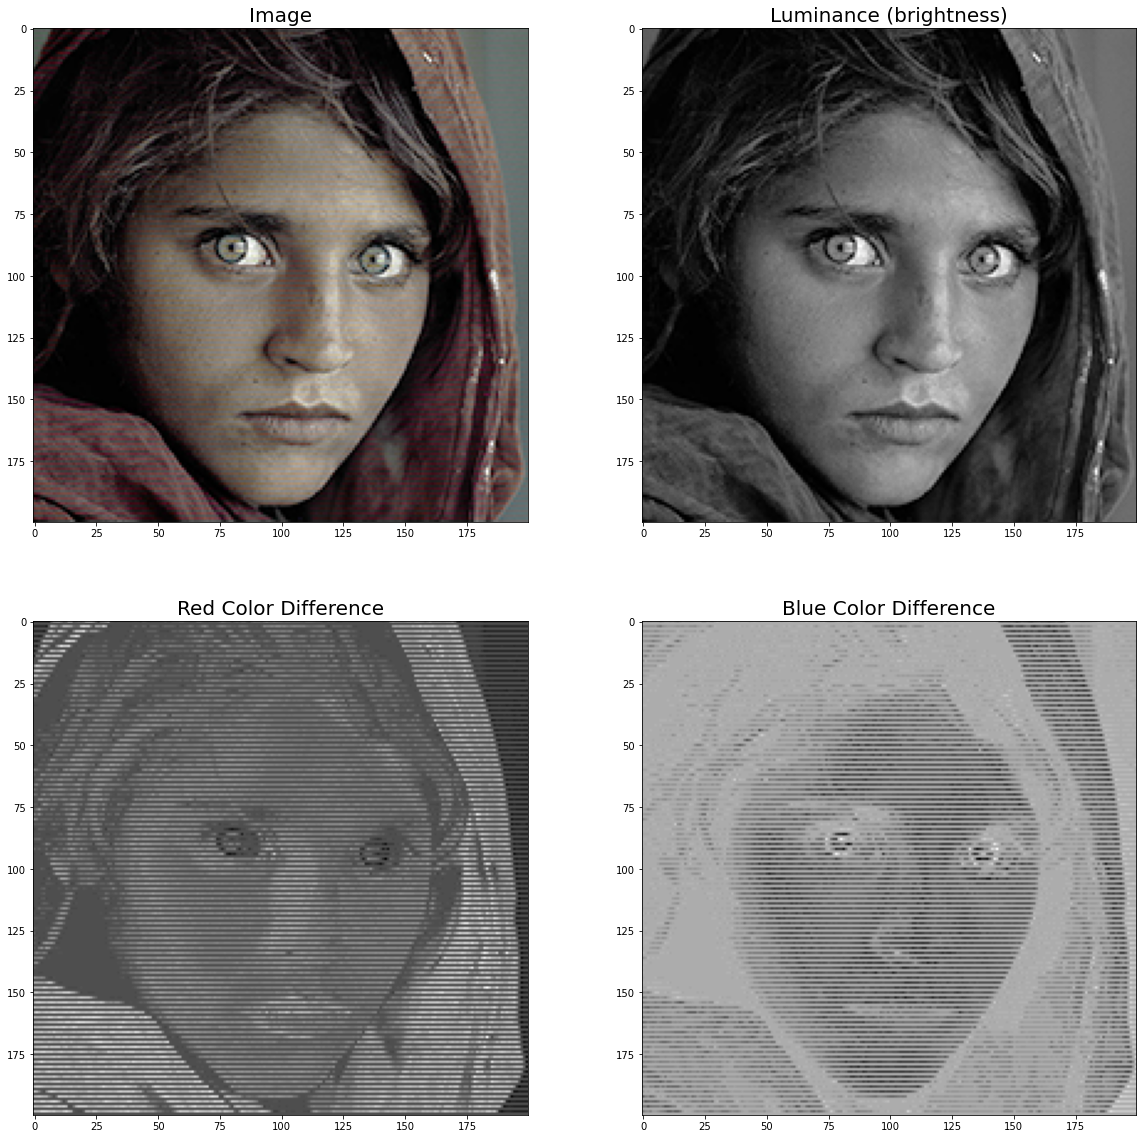

In [139]:
# Convert our blended compressed image to HSV
blended_YCrCb = cv2.cvtColor(blended, cv2.COLOR_RGB2YCrCb)

# Save each channel. Hue, Saturation, Value (Brightness, Intensity)
y = blended_YCrCb[:,:,0] 
Cr = blended_YCrCb[:,:,1]
Cb = blended_YCrCb[:,:,2]

output = [blended, y, Cr, Cb]
title = ['Image','Luminance (brightness)','Red Color Difference','Blue Color Difference']
fig = plt.figure(figsize = (20,20))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(title[i], fontdict={'fontsize': 20})
    if i == 0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i], cmap = 'gray')
     
plt.show()


##  Let's steal the Red Difference and the Blue Difference from the row above but keep the Luminance (brightness) from the odd rows. 

In [140]:
# Create a blank array to size our compressed image. 

decode_blended = np.zeros((200,200,3), dtype=np.uint8)

#Save the height, width, and depth
h = blended.shape[0]
w = blended.shape[1]


for y in range(0, h):
    for x in range(0,w):
        # Use the modulo operator as a way to get odd and even rows. 
        if(y % 2 == 0):
            # Save the color data in even rows. 
            decode_blended[y,x] = blended_YCrCb[y,x]
        else:
            decode_blended[y,x,0] = blended_YCrCb[y,x,0] 
            decode_blended[y,x,1] = blended_YCrCb[y-1,x,1]
            decode_blended[y,x,2] = blended_YCrCb[y-1,x,2]

In [141]:
decode_blended = cv2.cvtColor(decode_blended, cv2.COLOR_YCrCb2RGB)

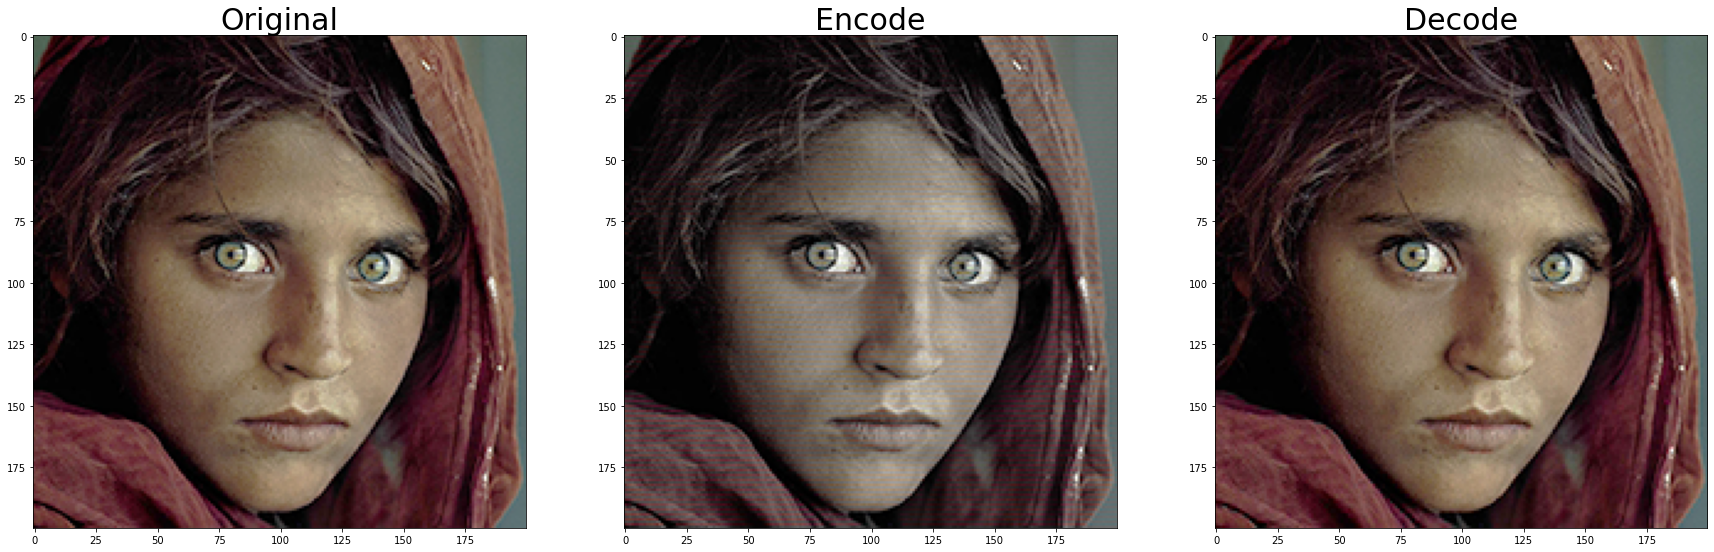

In [143]:

# Show images. 
fig = plt.figure(figsize = (30,50))
columns = 3
rows = 1
fig.add_subplot(rows,columns, 1)
plt.imshow(img)
plt.title('Original', fontdict={'fontsize': 30})
fig.add_subplot(rows,columns, 2)
plt.imshow(blended)
plt.title('Encode', fontdict={'fontsize': 30})
fig.add_subplot(rows,columns, 3)
plt.imshow(decode_blended)
plt.title('Decode', fontdict={'fontsize': 30})
plt.show()